<a href="https://colab.research.google.com/github/poorvaa18/Next_Word_Predictor/blob/main/NextWord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM-based Next Word Predictor

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [6]:
from google.colab import files
uploaded = files.upload()
# Save the uploaded file to a specific location
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])
    print('File saved:', filename)

Saving Romeo&Juliet.txt to Romeo&Juliet (1).txt
File saved: Romeo&Juliet.txt


In [7]:
file= open("Romeo&Juliet.txt",'r',encoding='utf8')
#storing file in a lit
linelist=[]
for i in file:
  linelist.append(i)

#converting list into string
data=""
for i in linelist:
  data=' '.join(linelist)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')
#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]  #selecting only first 500 characters

'The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [8]:
len(data)

160221

In [9]:
#tokenizing 
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#texts_to_sequences() method takes a list of texts as input and converts each text 
#into a sequence of integers based on the vocabulary learned by the tokenizer during the fitting step.
sequence_data=tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

pickle.dump(tokenizer,open('token.pkl','wb'))

In [10]:
sequence_data[:15]
#It provides a preview of the converted text data by showing the first 15 integers in the sequence.

[1, 53, 49, 306, 6, 12, 2, 22, 32, 967, 783, 16, 306, 8, 18]

In [11]:
len(sequence_data)

29352

In [12]:
#adding 1, the code accounts for an additional index that is reserved for out-of-vocabulary (OOV) words
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)
#represents the total number of unique words in the vocabulary,

4282


In [13]:
sequence=[]
for i in range(3, len(sequence_data)):
  words=sequence_data[i-3:i+1] #prediction of 4th word
  sequence.append(words)

sequence=np.array(sequence)
sequence[:5]
#the first 3 words are the input and the last word will be output

array([[  1,  53,  49, 306],
       [ 53,  49, 306,   6],
       [ 49, 306,   6,  12],
       [306,   6,  12,   2],
       [  6,  12,   2,  22]])

In [15]:
x=[]
y=[]
for i in sequence:
  x.append(i[0:3])
  y.append(i[3])

X=np.array(x)
y=np.array(y)
print("input Data - ",X[:10])
print('The Response - ',y[:10])

input Data -  [[  1  53  49]
 [ 53  49 306]
 [ 49 306   6]
 [306   6  12]
 [  6  12   2]
 [ 12   2  22]
 [  2  22  32]
 [ 22  32 967]
 [ 32 967 783]
 [967 783  16]]
The Response -  [306   6  12   2  22  32 967 783  16 306]


In [16]:
#to_categorical function converts y into a one-hot encoded representation, where each value in y is converted into a binary vector of length vocab_size.
y = to_categorical(y,num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
model = Sequential([
    Embedding(vocab_size,10,input_length=3),
    LSTM(1000,return_sequences =True),
    LSTM(1000,return_sequences=False),
    Dense(1000,activation='relu'),
    Dense(500,activation='relu'),
    Dense(vocab_size,activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             42820     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 4282)              2145282   
                                                                 
Total params: 15,737,602
Trainable params: 15,737,602


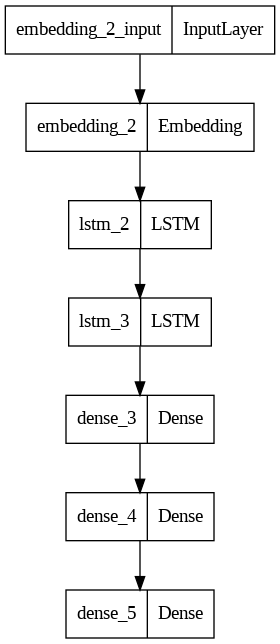

In [20]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True) # verbose= 1 -print a message when a new best model is found during training.
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))  # loss - categorical_crossentropy, used for multiclass classification problems.
model.fit(X, y, epochs=7, batch_size=64, callbacks=[checkpoint])

Epoch 1/7
459/459 [==============================] - ETA: 0s - loss: 6.8434
Epoch 1: loss improved from inf to 6.84341, saving model to next_words.h5
459/459 [==============================] - 291s 622ms/step - loss: 6.8434
Epoch 2/7
459/459 [==============================] - ETA: 0s - loss: 6.4520
Epoch 2: loss improved from 6.84341 to 6.45197, saving model to next_words.h5
459/459 [==============================] - 288s 628ms/step - loss: 6.4520
Epoch 3/7
459/459 [==============================] - ETA: 0s - loss: 6.2314
Epoch 3: loss improved from 6.45197 to 6.23139, saving model to next_words.h5
459/459 [==============================] - 274s 598ms/step - loss: 6.2314
Epoch 4/7
459/459 [==============================] - ETA: 0s - loss: 6.0219
Epoch 4: loss improved from 6.23139 to 6.02190, saving model to next_words.h5
459/459 [==============================] - 277s 602ms/step - loss: 6.0219
Epoch 5/7
459/459 [==============================] - ETA: 0s - loss: 5.7819
Epoch 5: loss im

In [22]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):  #The function will be used to predict the next word given the input text.
  
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))  #np.argmax()- obtain the index of the word with the highest probability.
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():  #word_index is a property of the tokenizer object in Keras
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue
